# Customer Churn Predection

In [87]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data analysis and manipulatiuon
import seaborn as sns # visualization
import matplotlib.pyplot as plt # vizualization
sns.set(style="ticks", context="talk") # sns style
plt.style.use("dark_background") # style


In [2]:
# read data from system
data = pd.read_csv('customerchurn.csv')
data.head()# display top 5 records

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.info()# information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.isnull().sum()# checking null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Pre-processing

###### Tenure

In [6]:
# Number of months the particular customer has stayed in the company

In [7]:
data[data['tenure'] == 0].index# if tenure is stayed 0 months , index that customer

data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)# drop those customer
data[data['tenure'] == 0].index
data['tenure'] = data['tenure'].astype('float64') # changing datatypes

###### Total Charge

In [8]:
# The total amount charged to the customer

In [9]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')# Convert argument to a numeric type.
# note some values are removed 
#Due to the internal limitations of ndarray, if numbers smaller than -9223372036854775808 (np.iinfo(np.int64).min) 
#or larger than 18446744073709551615 (np.iinfo(np.uint64).max) are passed in

In [10]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())# fill na with mean

In [11]:
def category_unique(data): # function for getting unique values in all objects
    for column in data: # iterate all columns in our data
        if data[column].dtypes == 'object': # if condition for columns is object types 
            print(f'{column} : {data[column].unique()}')# print column name and unique values
            print()

In [12]:
print()
category_unique(data)
print()


customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender : ['Female' 'Male']

Partner : ['Yes' 'No']

Dependents : ['No' 'Yes']

PhoneService : ['No' 'Yes']

MultipleLines : ['No phone service' 'No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes' 'No internet service']

OnlineBackup : ['Yes' 'No' 'No internet service']

DeviceProtection : ['No' 'Yes' 'No internet service']

TechSupport : ['No' 'Yes' 'No internet service']

StreamingTV : ['No' 'Yes' 'No internet service']

StreamingMovies : ['No' 'Yes' 'No internet service']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn : ['No' 'Yes']




In [13]:
#if no phone service and no internet servies are replaced by no, because both are same
data.replace('No phone service', 'No', inplace=True)
data.replace('No internet service', 'No', inplace=True)

### Label encoding

In [14]:
Categories_cols = ['Partner','Dependents','PhoneService',
                    'MultipleLines','OnlineSecurity',
                    'OnlineBackup','DeviceProtection','TechSupport',
                    'StreamingTV','StreamingMovies',
                    'PaperlessBilling']
for col in Categories_cols: # iterate over above columns in categories columns
    data[col].replace({'Yes': 1, 'No': 0}, inplace=True)# replace with 1 and 0, 

category_unique(data) 

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender : ['Female' 'Male']

InternetService : ['DSL' 'Fiber optic' 'No']

Contract : ['Month-to-month' 'One year' 'Two year']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn : ['No' 'Yes']



In [15]:
data['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
category_unique(data)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

InternetService : ['DSL' 'Fiber optic' 'No']

Contract : ['Month-to-month' 'One year' 'Two year']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn : ['No' 'Yes']



In [16]:
from sklearn import preprocessing
from sklearn import preprocessing

label_enc = preprocessing.LabelEncoder()
data["InternetService"] = label_enc.fit_transform(data["InternetService"])
data["Contract"]= label_enc.fit_transform(data["Contract"])
data["PaymentMethod"]= label_enc.fit_transform(data["PaymentMethod"])

In [17]:
data.dtypes# checking data types

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int32
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int32
PaperlessBilling      int64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1.0,0,0,0,0,...,0,0,0,0,0,1,2,29.85,29.85,No
1,5575-GNVDE,0,0,0,0,34.0,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1889.50,No
2,3668-QPYBK,0,0,0,0,2.0,1,0,0,1,...,0,0,0,0,0,1,3,53.85,108.15,Yes
3,7795-CFOCW,0,0,0,0,45.0,0,0,0,1,...,1,1,0,0,1,0,0,42.30,1840.75,No
4,9237-HQITU,1,0,0,0,2.0,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,Yes


In [19]:
# need to remove id in our data, id is not required to build the model
data = data.drop(['customerID'],axis=1)

In [20]:
data.head()# checking dataset after pre-processing

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1.0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,No
1,0,0,0,0,34.0,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,No
2,0,0,0,0,2.0,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,Yes
3,0,0,0,0,45.0,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,No
4,1,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


# Exploratory Data Analysis

In [21]:
# analysis the number of months stayed,
# total amount paid, 
# amount paid for each month

In [22]:
data[['tenure','MonthlyCharges','TotalCharges']].describe()# statistical approach of three columns

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Bivariate Analysis

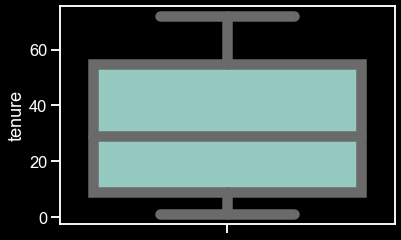

In [23]:

ax = sns.boxplot(y="tenure",linewidth=10.5, data=data)



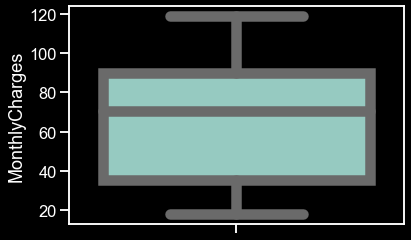

In [24]:
ax = sns.boxplot(y="MonthlyCharges",linewidth=10.5, data=data)

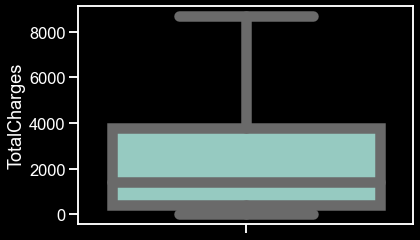

In [25]:
ax = sns.boxplot(y="TotalCharges",linewidth=10.5, data=data)

In [26]:
# churn-Whether the customer left the company or not (Yes - 1 or No - 2)
# checking if there is any outliers

In [27]:
MonthlyChargesAvg = data.groupby('tenure')['MonthlyCharges'].mean() # taking average monthly charge
TotalChargesAvg = data.groupby('tenure')['TotalCharges'].mean()# taking average total charge
ChurnRate = data.groupby('tenure')['Churn'].value_counts() # groupby the counts of churn 1 and 2 with tenure
ChurnRate = ChurnRate.loc[:,'Yes']/(ChurnRate.loc[:,'Yes']+ChurnRate.loc[:,'No']) # getting number of no churn rate
# total number of yes given no churn rate and yeschurn rate
CLV = TotalChargesAvg/ChurnRate # total charge divede by churn rate
CLV.name = 'CLV' # giving name for clv
MonthlyChargesAvg.name = 'MonthlyChargesAvg' # giving name for monthly average
TotalChargesAvg.name = 'TotalChargesAvg' # giving name for total charge
ChurnRate.name = 'ChurnRate' # giving name for churn rate
clv_df = pd.concat([MonthlyChargesAvg, TotalChargesAvg, CLV, ChurnRate],axis=1) # concate that four features
clv_df = clv_df.reset_index()#Reset the index of the DataFrame, and use the default one instead.

In [28]:
def outlier_detect(x,y):
    sns.lineplot(x,y)
    plt.show()
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


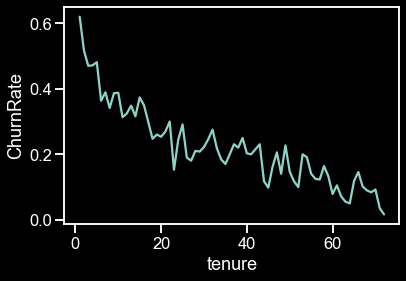

In [29]:
outlier_detect(clv_df.tenure,clv_df.ChurnRate)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


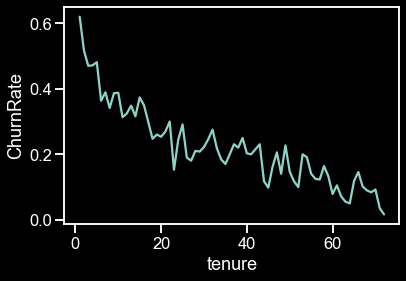

In [30]:
outlier_detect(clv_df.tenure,clv_df.ChurnRate)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


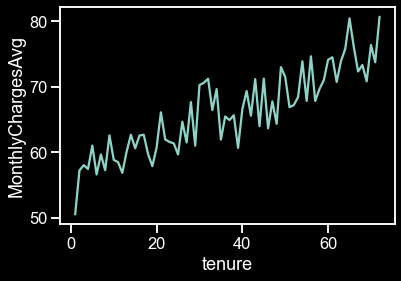

In [31]:
outlier_detect(clv_df.tenure,clv_df.MonthlyChargesAvg)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


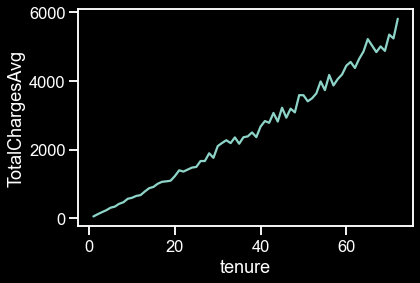

In [32]:
outlier_detect(clv_df.tenure,clv_df.TotalChargesAvg)

In [33]:
# if the tenure increasr, Customer Lifetime Value  also rise, 
# if Churn rate reduce( no one can left), Charges also rising.
# so, there is no outliers or duplicate values

In [34]:
counts=data.Churn.value_counts() 
counts

No     5163
Yes    1869
Name: Churn, dtype: int64

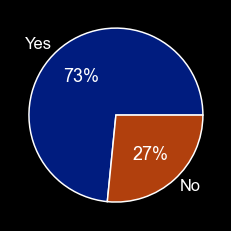

In [35]:
# target variable 
label = ["Yes","No"]
palette_color = sns.color_palette('dark')  
# plotting data on chart
plt.pie(counts, labels=label, colors=palette_color,
         autopct='%.0f%%')
  
# displaying chart
plt.show()

In [36]:
# thid dataset is imbalance, an imbalance dataset means the one of our target variable is high number than others,
#in this case yes is 26.6% and no is 73.4%,
# so, we have to use some sampling techniques, while building machine learning model.

In [37]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
# function for count plot
def count_plot(x,y):
    sns.countplot(x = x, hue = "Churn", data = data)
    plt.show()

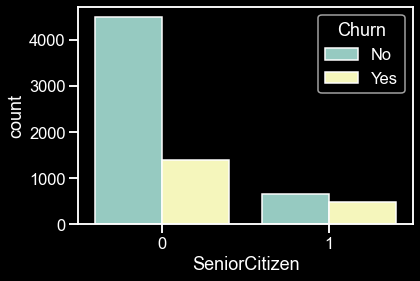

In [39]:
count_plot(data.SeniorCitizen,data.Churn) # senior citizen vs churn

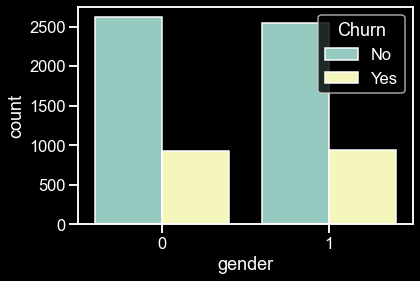

In [40]:
count_plot(data.gender,data.Churn) # gender vs churn

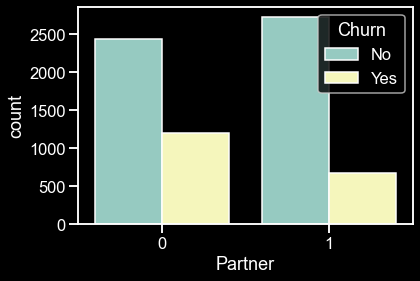

In [41]:
count_plot(data.Partner,data.Churn) # partners vs churn

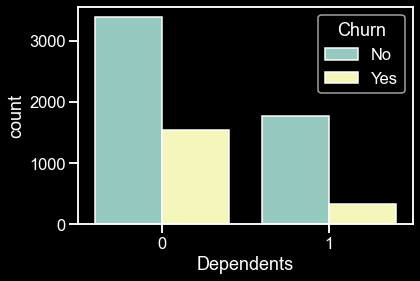

In [42]:
count_plot(data.Dependents,data.Churn) # Dependents vs churn

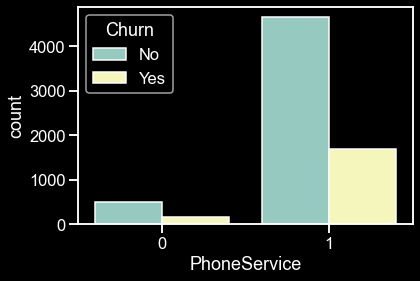

In [43]:
count_plot(data.PhoneService,data.Churn) # PhoneService vs churn

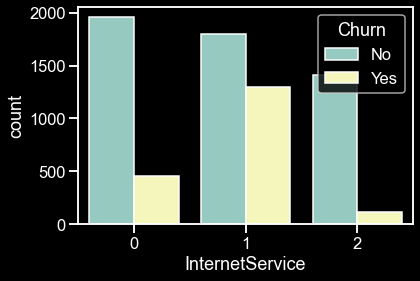

In [44]:
count_plot(data.InternetService,data.Churn) # InternetServicevs churn

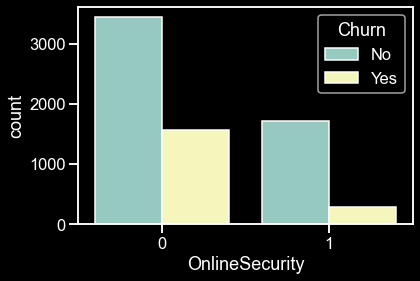

In [45]:
count_plot(data.OnlineSecurity,data.Churn) # OnlineSecurity vs churn

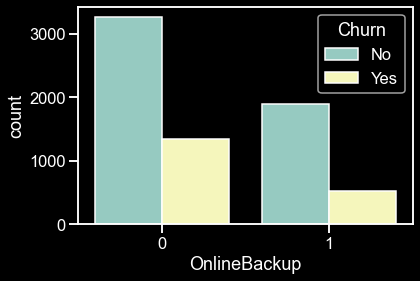

In [46]:
count_plot(data.OnlineBackup,data.Churn) # OnlineBackup vs churn

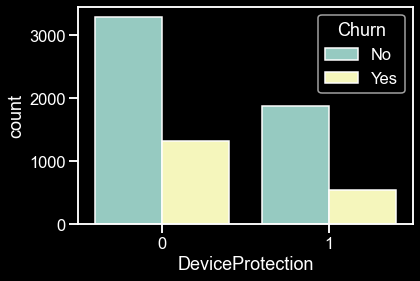

In [47]:
count_plot(data.DeviceProtection,data.Churn) #DeviceProtection vs churn

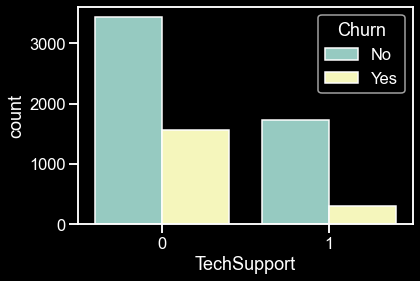

In [48]:
count_plot(data.TechSupport,data.Churn) # TechSupport vs churn

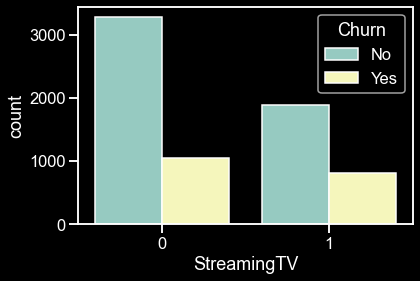

In [49]:
count_plot(data.StreamingTV,data.Churn) #StreamingTV vs churn

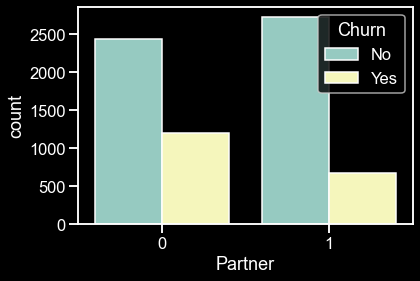

In [50]:
count_plot(data.Partner,data.Churn) # Partner vs churn

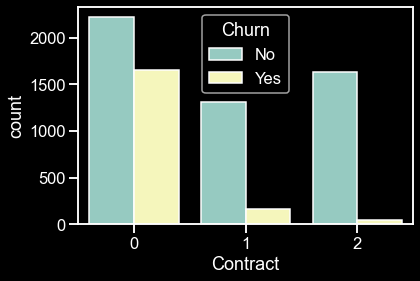

In [51]:
count_plot(data.Contract,data.Churn) # Contract vs churn

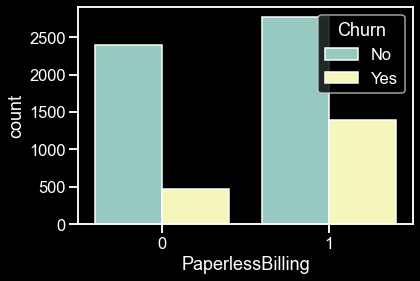

In [52]:
count_plot(data.PaperlessBilling,data.Churn) # PaperlessBilling vs churn

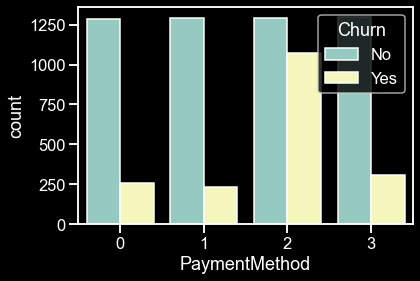

In [53]:
count_plot(data.PaymentMethod,data.Churn) # PaymentMethod vs churn

In [54]:
#SeniorCitizen: Senior citizens have a large number of churn rate
#compared to  regular citizens.

#Partner: People without a partner have a large churn rate,
#while those with a partner have a lesser churn rate.



#Dependents: The churn rate for persons without dependents is higher,




#Contract: Month-to-month contracts have a half the number of churn rate,
#one-year contracts have a churn rate of quarter, and two-year contracts have a very lesser churn rate. The smaller the churn rate, the longer the contract.



#PaperlessBilling: People who use Paperless Billing have a higher churn rate,
#compared to for those who don't.



# PaymentMethod: Electronic check users have a higher churn rate, 
# mailed check and bank users have a bit lesser than electronic check.

 

# Scaling

In [55]:
from sklearn.preprocessing import StandardScaler# libraries for standart scaling 0 to 1
scaler = StandardScaler()# sclar object 

cols_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']# this three columns are not in same scale , remaining is 0,1 0r 2

data[cols_scale] = scaler.fit_transform(data[cols_scale])# transform that three columns

# Spliting the data

In [56]:
X = data.drop('Churn', axis=1) # assigning x values 
y = data['Churn'].copy()# assigning y value

print(X.shape)# x shape
print(y.shape)# y shape

(7032, 19)
(7032,)


# Sampling the data

In [57]:
# our dataset is imbalance so we need to balance yes and no for avoid overfitting
from imblearn.over_sampling import SMOTE # over sampling libraries
oversample = SMOTE()# smote object
X_over, y_over = oversample.fit_resample(X, y)

# Feature Selection

In [61]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest, SelectPercentile# mutual info libraries
info = pd.DataFrame(mutual_info_classif(X_over,y_over),index=X_over.columns,columns=['mutual_info'])
info = info.sort_values(by='mutual_info',ascending=False)# sort value from higher to lower

In [62]:
info

,mutual_info
tenure,0.290582
Contract,0.152459
MonthlyCharges,0.127763
InternetService,0.072376
PaymentMethod,0.058436
TotalCharges,0.053136
OnlineSecurity,0.044986
TechSupport,0.039851
Partner,0.030992
Dependents,0.027838


In [63]:
a = list(info[info.mutual_info<0.01].index)
X_fs = X.drop(columns=a)

In [64]:
# balancing the dataset again after feature selection
from imblearn.over_sampling import SMOTE # over sampling libraries
oversample = SMOTE()# smote object
X_over, y_over = oversample.fit_resample(X_fs, y)

# Train Test Split

In [65]:
from sklearn.model_selection import train_test_split#train test split libraries
X_train, X_test, y_train, y_test=train_test_split(X_over, y_over, test_size=0.3, random_state=42)# test size 30 %


In [66]:
print("Shape of Training Data",X_train.shape)# shape of training data
print("Shape of Testing Data",X_test.shape)# shape of testing data

Shape of Training Data (7228, 12)
Shape of Testing Data (3098, 12)


In [67]:
y_train.value_counts() # checking the dataset is balance or not

Yes    3628
No     3600
Name: Churn, dtype: int64



# Logistics Regression


In [68]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0, max_iter=1000, solver='lbfgs', class_weight='balanced')
log.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

In [69]:
# predicting
y_pred = log.predict(X_test)

In [70]:
# evaluation
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.72      0.76      1563
         Yes       0.74      0.82      0.78      1535

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098



In [71]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1118  445]
 [ 270 1265]]


In [72]:
# performance matrix
from sklearn.metrics import roc_auc_score,accuracy_score

y_prob_scores_test = log.predict_proba(X_test)[:,1]
auc_score_log= round(roc_auc_score(y_test, y_prob_scores_test),2)
accuracy_log = round(accuracy_score(y_test, y_pred),2)
print()
print("Logistics Regression : ACCURACY - - - - -:",accuracy_log )
print()
print("Logistics Regression : AUC SCORE - - - - -:",auc_score_log )
print()




Logistics Regression : ACCURACY - - - - -: 0.77

Logistics Regression : AUC SCORE - - - - -: 0.85



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


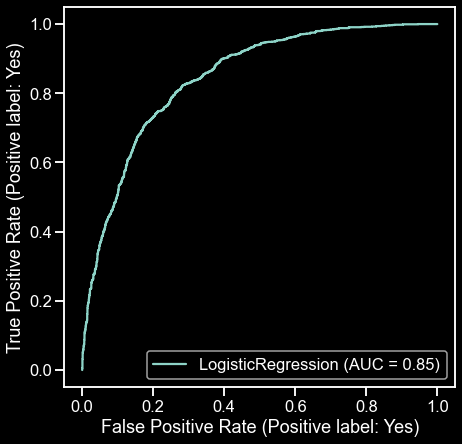

In [73]:
# roc plot
from sklearn.metrics import plot_roc_curve
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(log, X_test, y_test, ax = ax)

# K Nearest Neighbors

In [74]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [75]:
# evaluation
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.82      0.76      0.79      1563
         Yes       0.77      0.83      0.80      1535

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098



In [76]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1187  376]
 [ 268 1267]]


In [77]:
# performance matrix
from sklearn.metrics import roc_auc_score,accuracy_score

y_prob_scores_test_knn = knn.predict_proba(X_test)[:,1]
auc_score_knn = round(roc_auc_score(y_test, y_prob_scores_test_knn),2)
accuracy_knn = round(accuracy_score(y_test, y_pred),2)
print()
print("K Nearest Neighbors : ACCURACY - - - - -:",accuracy_knn )
print()
print("K Nearest Neighbors : AUC SCORE - - - - -:",auc_score_knn )
print()



K Nearest Neighbors : ACCURACY - - - - -: 0.79

K Nearest Neighbors : AUC SCORE - - - - -: 0.79



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


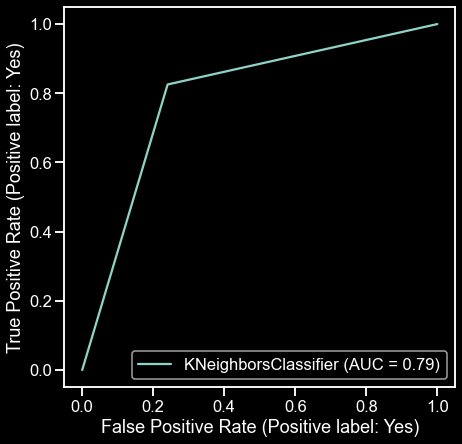

In [78]:
# roc plot
from sklearn.metrics import plot_roc_curve
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(knn, X_test, y_test, ax = ax)

# Decision Tree

In [79]:
# training and predicting
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [80]:
# evaluation
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.66      0.74      1563
         Yes       0.72      0.87      0.79      1535

    accuracy                           0.77      3098
   macro avg       0.78      0.77      0.76      3098
weighted avg       0.78      0.77      0.76      3098



In [81]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1033  530]
 [ 198 1337]]


In [82]:
# performance matrix
from sklearn.metrics import roc_auc_score,accuracy_score

y_prob_scores_test_clf = clf.predict_proba(X_test)[:,1]
auc_score_clf = round(roc_auc_score(y_test, y_prob_scores_test_clf),2)
accuracy = round(accuracy_score(y_test, y_pred),2)
print()
print("Decision Tree Classifier : ACCURACY - - - - -:",accuracy )
print()
print("Decision Tree Classifier : AUC SCORE - - - - -:",auc_score_clf )
print()


Decision Tree Classifier : ACCURACY - - - - -: 0.77

Decision Tree Classifier : AUC SCORE - - - - -: 0.84



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


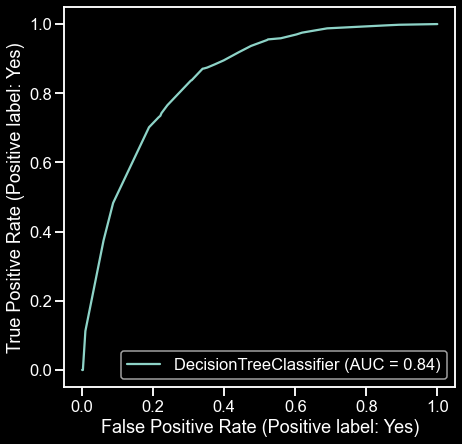

In [83]:
# roc plot
from sklearn.metrics import plot_roc_curve
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(clf, X_test, y_test, ax = ax)